In [2]:
%load_ext autoreload
%autoreload 1

In [3]:
%aimport exv2.experiment_results 

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from IPython.display import Markdown

pd.set_option('display.max_columns', None)

In [22]:
MANUAL="data/2024-06-2[2-5]*"
exr = exv2.experiment_results.ExperimentResults(MANUAL)

# Validation Goals
1. Validate that we our aggregations contain fitting data (no tracking the loadgenerator as part of the load)
2. Validate that workloads do what we think they do
3. Validate that we measure resonable values



In [10]:
display(Markdown('''
# Assumtion:
 1. There should be 7 pods (registry, webui, auth, persistance, recommender, image, db) | exept for the monolith 
 2. There should be 3 instances (ise-knode1, ise-knode6, sm-gpu) 
'''))

awesomepods = exr.pods.copy()
awesomepods['pod_name'] = awesomepods['name'].apply(lambda x: x[:-2])

awesomepods = awesomepods.groupby(["urun"])[["pod_name","instance"]].nunique()
## Issues:
display(Markdown("## where are the 4 instances and 8 pods comming from? loadgeneraotr?"))
display(awesomepods[((awesomepods["pod_name"] < 7) | (awesomepods["pod_name"] > 8)) | (awesomepods["instance"] > 3)])




# Assumtion:
 1. There should be 7 pods (registry, webui, auth, persistance, recommender, image, db) | exept for the monolith 
 2. There should be 3 instances (ise-knode1, ise-knode6, sm-gpu) 


## where are the 4 instances and 8 pods comming from? loadgeneraotr?

,pod_name,instance
urun,,
2024-06-22_11-26-02_baseline_vanilla_full_exp_scale_pausing_1,8,4
2024-06-22_11-26-02_baseline_vanilla_full_exp_scale_rampup_0,8,4
2024-06-22_11-26-02_baseline_vanilla_full_exp_scale_rampup_1,8,4
2024-06-22_11-26-02_dbopt_feature_db-optimization_full_exp_scale_fixed_0,8,4
2024-06-22_11-26-02_dbopt_feature_db-optimization_full_exp_scale_fixed_1,8,4
2024-06-22_11-26-02_dbopt_feature_db-optimization_full_exp_scale_pausing_1,8,4
2024-06-22_11-26-02_jvm_jvm-impoove_full_exp_scale_rampup_0,8,4
2024-06-22_11-26-02_jvm_jvm-impoove_full_exp_scale_rampup_1,8,4
2024-06-22_11-26-02_jvm_jvm-impoove_full_exp_scale_shaped_0,8,4


In [11]:
# Validating lg Assumtion we accedentaly track also the loadgenerator?

awesomepods = exr.pods.copy()
awesomepods = awesomepods[awesomepods["name"] != "loadgenerator"]
awesomepods['pod_name'] = awesomepods['name'].apply(lambda x: x[:-2])


awesomepods = awesomepods.groupby(["urun"])[["pod_name","instance"]].nunique()
## Issues:
display(Markdown("## where are the 4 instances comming from?"))
awesomepods[((awesomepods["pod_name"] < 7) | (awesomepods["pod_name"] > 8)) | (awesomepods["instance"] > 3)]


## where are the 4 instances comming from?

,pod_name,instance
urun,,
2024-06-22_11-26-02_baseline_vanilla_full_exp_scale_pausing_1,7,4
2024-06-22_11-26-02_baseline_vanilla_full_exp_scale_rampup_0,7,4
2024-06-22_11-26-02_baseline_vanilla_full_exp_scale_rampup_1,7,4
2024-06-22_11-26-02_dbopt_feature_db-optimization_full_exp_scale_fixed_0,7,4
2024-06-22_11-26-02_dbopt_feature_db-optimization_full_exp_scale_fixed_1,7,4
2024-06-22_11-26-02_dbopt_feature_db-optimization_full_exp_scale_pausing_1,7,4
2024-06-22_11-26-02_jvm_jvm-impoove_full_exp_scale_rampup_0,7,4
2024-06-22_11-26-02_jvm_jvm-impoove_full_exp_scale_rampup_1,7,4
2024-06-22_11-26-02_lessrec_feature_lessrecs_full_exp_scale_fixed_0,7,4


In [12]:
awesomepods = exr.pods.copy()
awesomepods = awesomepods[awesomepods["name"] != "loadgenerator"]
awesomepods['pod_name'] = awesomepods['name'].apply(lambda x: x[:-2])

display(Markdown("## We have unknown instances... filtering did not work"))
awesomepods[awesomepods["urun"] == "2024-06-22_11-26-02_obs_feature_object-storage_full_exp_scale_fixed_1"]["instance"].unique()

## We have unknown instances... filtering did not work

array(['unknown', 'ise-knode1', 'sm-gpu', 'ise-knode6'], dtype=object)

In [18]:
display(Markdown('''# Workload validation 
1. the fixed workload should have close to the same requests regadless of feature
2. all worloads should have the same runtime (+-)
3. all workloads should have a reasonable failure rate and success rate over time and the failiures of workloads should be within reason. 
4. the workload shapes should fit the shape assumtions.
    - the rampup workload should cause cpu_usage increase over time
    - the rampup workload should have an increasing number of parallel users over time
    - the fixed worklaod should have an sudden stop whenever the threshold is hit
    - the pausing workload should start and stop parallel users every 120*(n**2) minutes
    - the pausing workload should have low cpu_usage
    - the shaped workload should show visible waves 
'''))

fixed_wl_check = exr.run_stats()

#Issues: anything 1.0+-0.1
fixed_wl_check[fixed_wl_check["exp_workload"]=="exp_scale_fixed"].groupby(["exp_branch"])[["Request Count"]].mean() / fixed_wl_check[fixed_wl_check["exp_workload"]=="exp_scale_fixed"][["Request Count"]].mean()

# Assumtion, the fix workload is not perfroming as intented.
display(Markdown("## Monolith WL shows issues. Investigate"))

# Workload validation 
1. the fixed workload should have close to the same requests regadless of feature
2. all worloads should have the same runtime (+-)
3. all workloads should have a reasonable failure rate and success rate over time and the failiures of workloads should be within reason. 
4. the workload shapes should fit the shape assumtions.
    - the rampup workload should cause cpu_usage increase over time
    - the rampup workload should have an increasing number of parallel users over time
    - the fixed worklaod should have an sudden stop whenever the threshold is hit
    - the pausing workload should start and stop parallel users every 120*(n**2) minutes
    - the pausing workload should have low cpu_usage
    - the shaped workload should show visible waves 


## Monolith WL shows issues. Investigate

In [19]:
hist = exr.stats_history.groupby(["exp_branch","exp_workload","run_iteration","run_time"])[["user_count"]].min()
hist = hist.reset_index()
hist["exp_workload"].unique()
display(Markdown("## Looking into workload execution"))

## Looking into workload execution

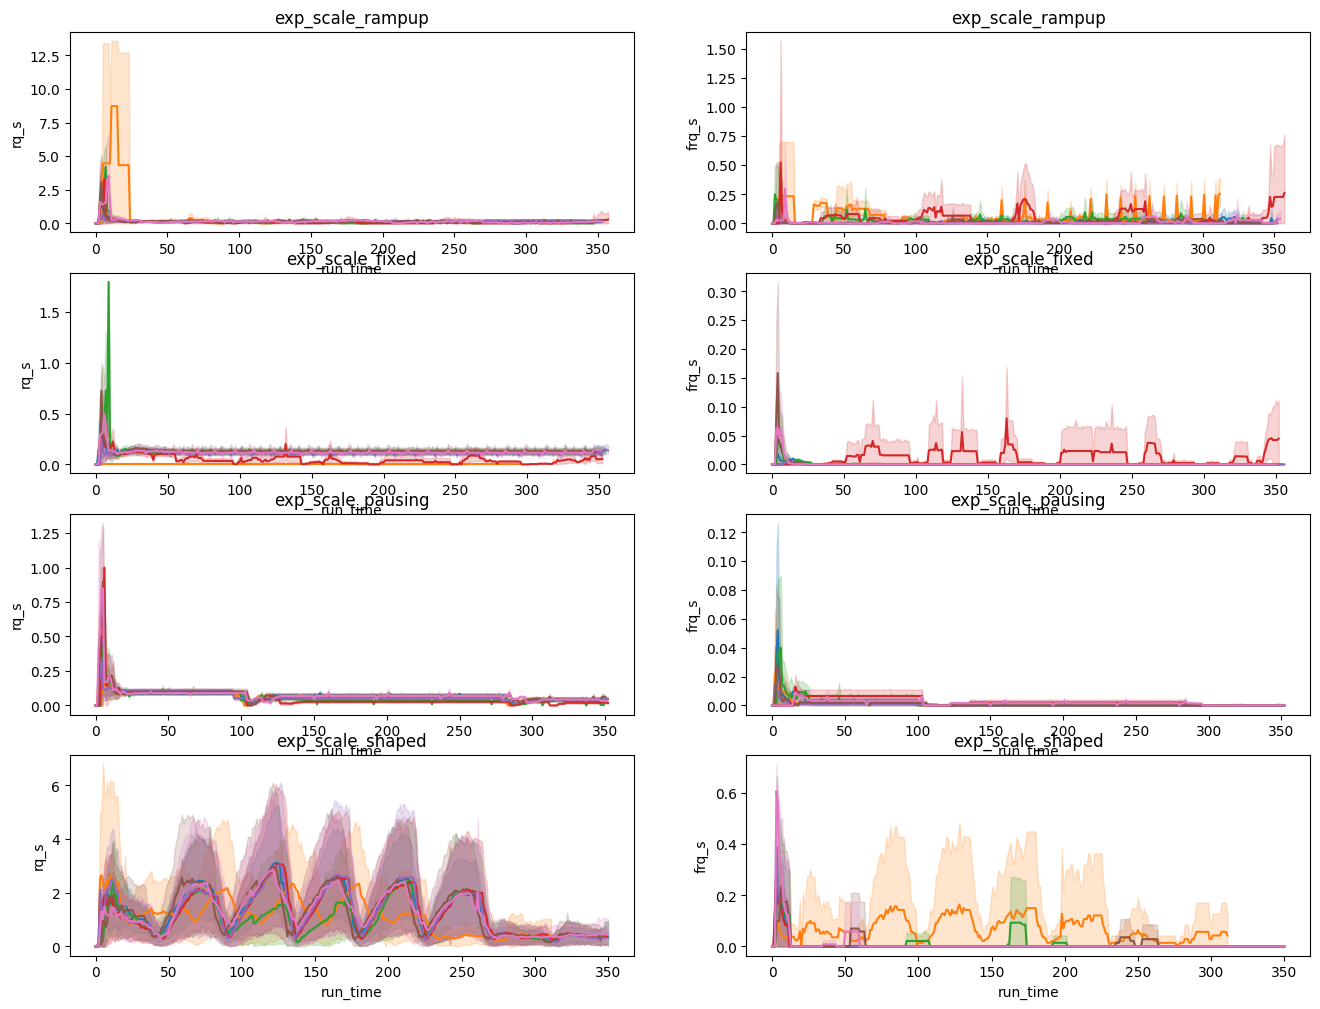

In [143]:
fig = plt.figure(figsize=(16,12))
gs = GridSpec(exr.stats_history["exp_workload"].nunique(), 2, figure=fig)

for i, w in enumerate(exr.stats_history["exp_workload"].unique()):
    ax = fig.add_subplot(gs[i, 0])
    sns.lineplot(data=exr.stats_history[(exr.stats_history["exp_workload"] == w)], x="run_time",y="rq_s", hue="exp_branch",ax=ax, legend=None)
    ax.set_title(w)

    ax = fig.add_subplot(gs[i, 1])
    sns.lineplot(data=exr.stats_history[(exr.stats_history["exp_workload"] == w)], x="run_time",y="frq_s", hue="exp_branch",ax=ax, legend=None)
    ax.set_title(w)

## First observations
- there seems to be some high faliure rates in some features
- execpt shaped, the rq/s seems low
- odd rq/s on the start, do we scale badly or are sending to few requests?

In [102]:
times = exr.pods.groupby("urun")["run_time"].agg(["min","max"])
times["dur"] = times["max"] - times["min"]
times["dur"] = times["dur"].apply(lambda x:x.total_seconds())
estimated_size_and_time = exr.stats
estimated_size_and_time["mrt"]=estimated_size_and_time["Request Count"]*estimated_size_and_time["Average Response Time"]
estimated_size_and_time["mcs"]=estimated_size_and_time["Request Count"]*estimated_size_and_time["Average Content Size"]

stats = exr.stats.groupby("urun")[["Request Count","Failure Count"]].sum()
stats = stats.merge(times["dur"], on="urun")
stats = stats.merge(estimated_size_and_time.groupby(["urun"])[["mrt","mcs"]].sum(), on="urun")
stats = stats.rename(columns={
    "Request Count":"rq","Failure Count":"frq"
})

stats["rq/s"] = stats["rq"] / stats["dur"]
stats["frq/s"] = stats["frq"] / stats["dur"]
stats["mthr/s"] = stats["mcs"] / stats["dur"]
stats["reliability"] = stats["frq"]/stats["rq"]

stats = stats.reset_index()[["urun","rq/s","frq/s","mthr/s","mrt","reliability"]]

display(Markdown("## Unreliable runs"))
unreliable_runs = stats[stats["reliability"] > 0.2][["urun","reliability"]]
display(unreliable_runs)

display(Markdown("## Slow runs"))
slow_runs = stats[stats["rq/s"]< 3]
display(slow_runs)

display(Markdown("## Runs with very little response size volume (app mby not dooing what it was supposed to?)"))
small_runs =stats[stats["mrt"] < 200_000]
display(small_runs)

display(Markdown("## List of suspicious runs"))
display(Markdown("\n ".join(f"- {ele}" for ele in list(stats[stats.index.isin(set(unreliable_runs.index) | set( slow_runs.index) | set(small_runs.index))]["urun"].values))))

## Unreliable runs

,urun,reliability
4,2024-06-22_11-26-02_baseline_vanilla_full_exp_...,0.276269
5,2024-06-22_11-26-02_baseline_vanilla_full_exp_...,0.200459
13,2024-06-22_11-26-02_dbopt_feature_db-optimizat...,0.280811
40,2024-06-22_11-26-02_obs_feature_object-storage...,0.417274
41,2024-06-22_11-26-02_obs_feature_object-storage...,0.388627
43,2024-06-22_11-26-02_obs_feature_object-storage...,0.704384
44,2024-06-22_11-26-02_obs_feature_object-storage...,0.741268
51,2024-06-25_17-27-15_baseline_vanilla_full_exp_...,0.304826
55,2024-06-25_17-27-15_monolith_feature_monolith_...,0.293103
56,2024-06-25_17-27-15_monolith_feature_monolith_...,0.327273


## Slow runs

,urun,rq/s,frq/s,mthr/s,mrt,reliability
2,2024-06-22_11-26-02_baseline_vanilla_full_exp_...,2.362606,0.019830,132758.640227,3.690060e+05,0.008393
3,2024-06-22_11-26-02_baseline_vanilla_full_exp_...,1.824859,0.115819,95285.536723,9.712542e+05,0.063467
10,2024-06-22_11-26-02_dbopt_feature_db-optimizat...,2.158640,0.033994,113109.864023,6.309811e+05,0.015748
11,2024-06-22_11-26-02_dbopt_feature_db-optimizat...,1.918079,0.039548,94445.031073,8.066026e+05,0.020619
18,2024-06-22_11-26-02_jvm_jvm-impoove_full_exp_s...,2.195467,0.008499,69997.529745,3.091874e+05,0.003871
19,2024-06-22_11-26-02_jvm_jvm-impoove_full_exp_s...,2.161473,0.011331,68172.773371,4.079195e+05,0.005242
26,2024-06-22_11-26-02_lessrec_feature_lessrecs_f...,2.209040,0.036723,95993.248588,7.447440e+05,0.016624
27,2024-06-22_11-26-02_lessrec_feature_lessrecs_f...,2.235127,0.025496,101939.175637,3.742204e+05,0.011407
34,2024-06-22_11-26-02_norec_feature_norecommenda...,2.141243,0.005650,85479.406780,4.194194e+05,0.002639
35,2024-06-22_11-26-02_norec_feature_norecommenda...,2.192635,0.014164,91957.747875,5.615747e+05,0.006460


## Runs with very little response size volume (app mby not dooing what it was supposed to?)

,urun,rq/s,frq/s,mthr/s,mrt,reliability
14,2024-06-22_11-26-02_dbopt_feature_db-optimizat...,8.472303,0.011662,902019.329446,125907.629310,0.001376
22,2024-06-22_11-26-02_jvm_jvm-impoove_full_exp_s...,8.529070,0.014535,537301.002907,129979.987954,0.001704
23,2024-06-22_11-26-02_jvm_jvm-impoove_full_exp_s...,8.367347,0.005831,545138.288630,137854.367513,0.000697
31,2024-06-22_11-26-02_lessrec_feature_lessrecs_f...,8.465116,0.014535,863111.735465,133228.609378,0.001717
45,2024-06-22_11-26-02_obs_feature_object-storage...,8.545190,0.008746,143229.720117,159118.316766,0.001024
46,2024-06-22_11-26-02_obs_feature_object-storage...,8.383721,0.005814,142821.206395,161975.296320,0.000693
53,2024-06-25_17-27-15_baseline_vanilla_full_exp_...,8.451895,0.005831,909188.930029,127369.103051,0.000690
54,2024-06-25_17-27-15_baseline_vanilla_full_exp_...,8.486880,0.014577,918558.918367,147224.624228,0.001718


## List of suspicious runs

- 2024-06-22_11-26-02_baseline_vanilla_full_exp_scale_pausing_0
 - 2024-06-22_11-26-02_baseline_vanilla_full_exp_scale_pausing_1
 - 2024-06-22_11-26-02_baseline_vanilla_full_exp_scale_rampup_0
 - 2024-06-22_11-26-02_baseline_vanilla_full_exp_scale_rampup_1
 - 2024-06-22_11-26-02_dbopt_feature_db-optimization_full_exp_scale_pausing_0
 - 2024-06-22_11-26-02_dbopt_feature_db-optimization_full_exp_scale_pausing_1
 - 2024-06-22_11-26-02_dbopt_feature_db-optimization_full_exp_scale_rampup_1
 - 2024-06-22_11-26-02_dbopt_feature_db-optimization_full_exp_scale_shaped_0
 - 2024-06-22_11-26-02_jvm_jvm-impoove_full_exp_scale_pausing_0
 - 2024-06-22_11-26-02_jvm_jvm-impoove_full_exp_scale_pausing_1
 - 2024-06-22_11-26-02_jvm_jvm-impoove_full_exp_scale_shaped_0
 - 2024-06-22_11-26-02_jvm_jvm-impoove_full_exp_scale_shaped_1
 - 2024-06-22_11-26-02_lessrec_feature_lessrecs_full_exp_scale_pausing_0
 - 2024-06-22_11-26-02_lessrec_feature_lessrecs_full_exp_scale_pausing_1
 - 2024-06-22_11-26-02_lessrec_feature_lessrecs_full_exp_scale_shaped_1
 - 2024-06-22_11-26-02_norec_feature_norecommendations_full_exp_scale_pausing_0
 - 2024-06-22_11-26-02_norec_feature_norecommendations_full_exp_scale_pausing_1
 - 2024-06-22_11-26-02_obs_feature_object-storage_full_exp_scale_fixed_0
 - 2024-06-22_11-26-02_obs_feature_object-storage_full_exp_scale_fixed_1
 - 2024-06-22_11-26-02_obs_feature_object-storage_full_exp_scale_pausing_0
 - 2024-06-22_11-26-02_obs_feature_object-storage_full_exp_scale_rampup_0
 - 2024-06-22_11-26-02_obs_feature_object-storage_full_exp_scale_rampup_1
 - 2024-06-22_11-26-02_obs_feature_object-storage_full_exp_scale_shaped_0
 - 2024-06-22_11-26-02_obs_feature_object-storage_full_exp_scale_shaped_1
 - 2024-06-25_17-27-15_baseline_vanilla_full_exp_scale_pausing_0
 - 2024-06-25_17-27-15_baseline_vanilla_full_exp_scale_pausing_1
 - 2024-06-25_17-27-15_baseline_vanilla_full_exp_scale_rampup_0
 - 2024-06-25_17-27-15_baseline_vanilla_full_exp_scale_shaped_0
 - 2024-06-25_17-27-15_baseline_vanilla_full_exp_scale_shaped_1
 - 2024-06-25_17-27-15_monolith_feature_monolith_full_exp_scale_fixed_0
 - 2024-06-25_17-27-15_monolith_feature_monolith_full_exp_scale_fixed_1
 - 2024-06-25_17-27-15_monolith_feature_monolith_full_exp_scale_pausing_0
 - 2024-06-25_17-27-15_monolith_feature_monolith_full_exp_scale_pausing_1
 - 2024-06-25_17-27-15_monolith_feature_monolith_full_exp_scale_rampup_1

'#that should be different?'

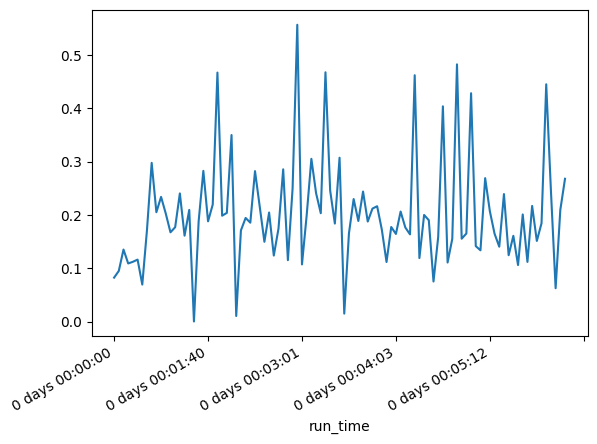

In [87]:
rampup_check = exr.pods[exr.pods["exp_workload"] == "exp_scale_rampup"]
rampup_check.groupby(["run_time"])["cpu_usage"].mean().plot()
display("#that should be different?")

# Learnings
---

1. Monolith is not working correclty, most request are failing
2. only shaped seames to have a somewhat expected worklaod profile
3. fixed and rampup may not produce the intented worklaod profile.
4. We still include the loadgenerator in the measrumentes
5. We seem to allow the loadgenerator to run also in the measured instances (otherwiese all measrumentes would inlcude 4 nodes if the lg is included?)